In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [0]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [0]:
df.drop(105, axis = 0, inplace=True)

In [0]:
df.drop(106, axis = 0, inplace=True)

In [0]:
df.columns=['Months','Sales per month']

In [0]:
df['Months'] = pd.to_datetime(df['Months'])

In [0]:
df.set_index('Months',inplace=True)

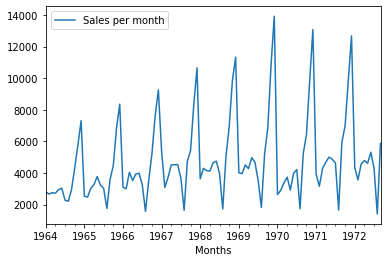

In [21]:
df.plot()

In [22]:
model=sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


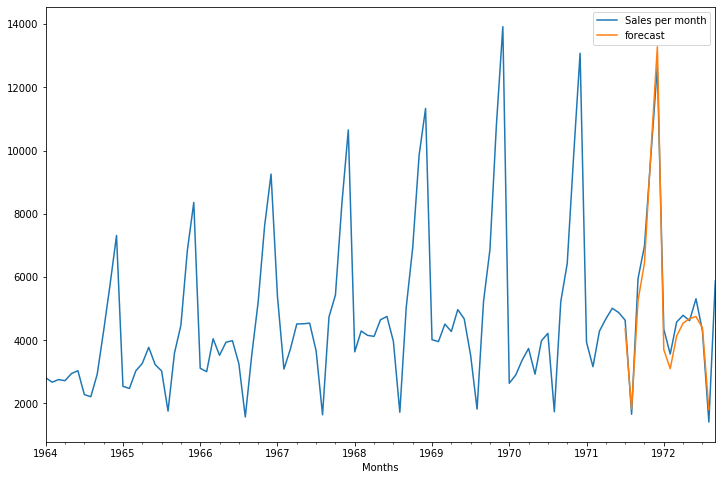

In [23]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [0]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [0]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [26]:
future_datest_df

,Sales per month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [0]:
future_df=pd.concat([df,future_datest_df])

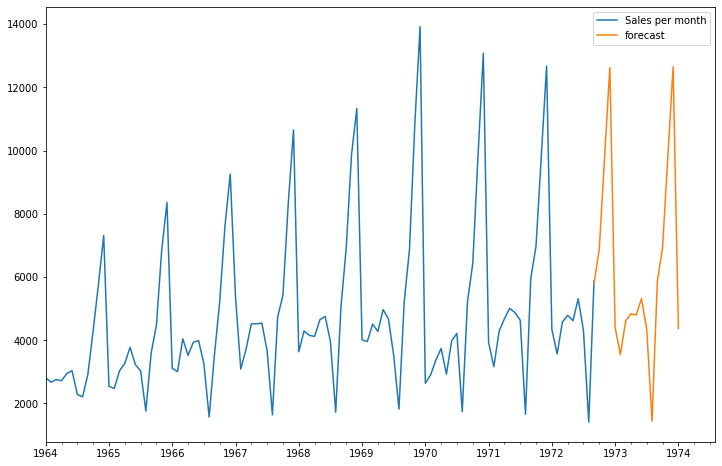

In [28]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8))